<a href="https://colab.research.google.com/github/Tejas-Rao01/Ai_for_prognostics/blob/main/Ai_in_manu_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
import os
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from numpy.random import seed
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json
from sklearn.metrics import accuracy_score,f1_score



In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing Classifiers 

import xgboost as xgb
import catboost as cb
import lightgbm as lgbm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
!pip install optuna-dashboard
import optuna


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Loading Dataset
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                               9KB  2022-10-06 08:55:25           8957        292  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset        11KB  2022-09-30 04:05:11           7116        230  1.0              
whenamancodes/students-performance-in-exams                     Students Performance in Exams                  9KB  2022-09-14 15:14:54          12479        234  1.0            

In [ ]:
! kaggle datasets download -d vinayak123tyagi/bearing-dataset

bearing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir data
!unzip bearing-dataset.zip -d data

mkdir: cannot create directory ‘data’: File exists
Archive:  bearing-dataset.zip
replace data/1st_test/1st_test/2003.10.22.12.06.24? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Storing Data into Data Frame
data_dir = '/content/data/2nd_test/2nd_test'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    #print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)

merged_data.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']


In [ ]:
merged_data

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004.02.18.06.32.39,0.116307,0.080654,0.084023,0.051400
2004.02.18.10.52.39,0.111428,0.081708,0.082621,0.051785
2004.02.16.09.02.39,0.068176,0.073138,0.076444,0.044163
2004.02.18.21.02.39,0.116119,0.103587,0.110326,0.062112
2004.02.18.11.02.39,0.110105,0.079961,0.084504,0.050485
...,...,...,...,...
2004.02.19.02.52.39,0.183008,0.146808,0.149630,0.086438
2004.02.17.07.12.39,0.085706,0.074827,0.076990,0.046758
2004.02.18.02.52.39,0.084915,0.077520,0.078333,0.046816
2004.02.16.05.02.39,0.067156,0.073674,0.077679,0.044635


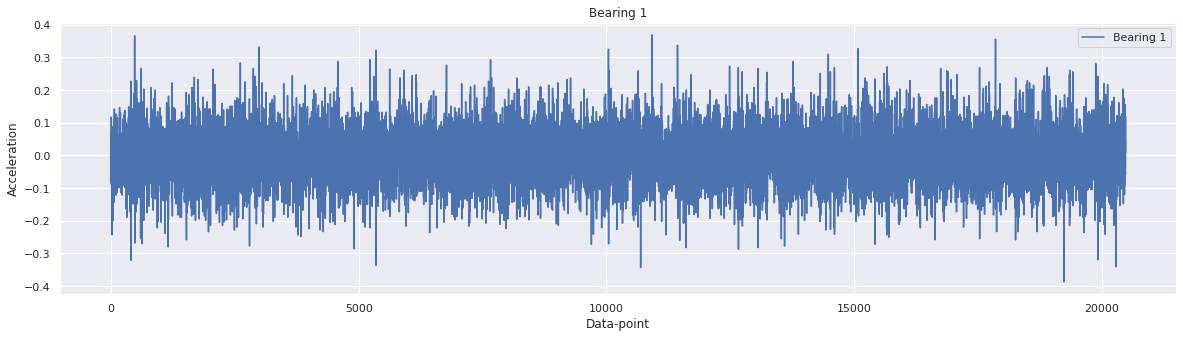

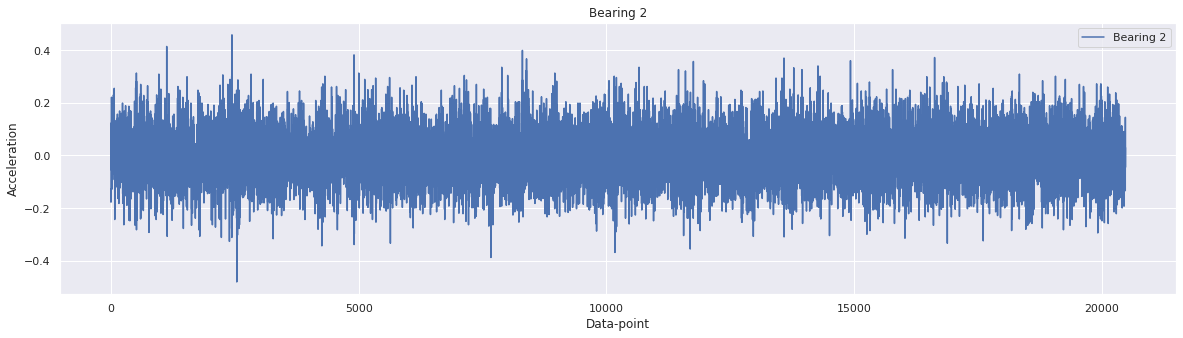

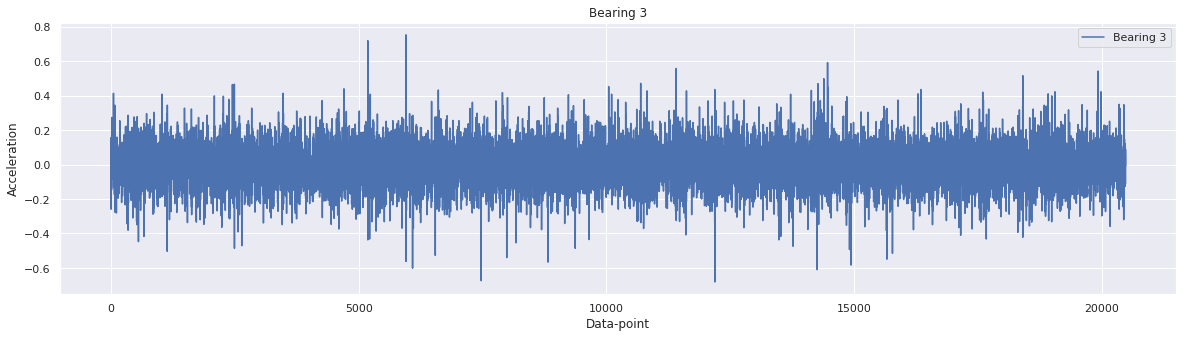

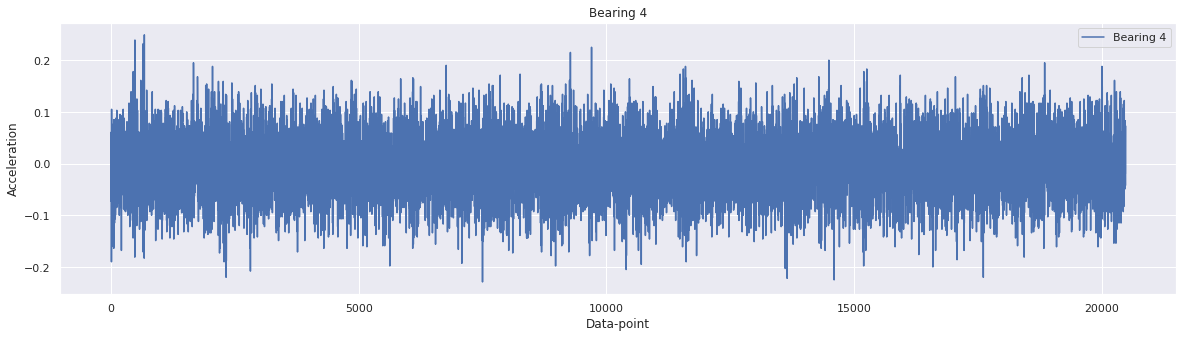

In [ ]:
## Data Exploration 


dataset=pd.read_csv("/content/data/2nd_test/2nd_test/2004.02.12.10.42.39",sep='\t',header=None)
for i in [0,1,2,3]:
    df_bearing=np.array(dataset.iloc[:,i])
    plt.figure(figsize=(20, 5))
    plt.plot(df_bearing)
    plt.legend(['Bearing {}'.format(i+1)])
    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('Bearing {}'.format(i+1))
    plt.show()



In [ ]:
def compute_skewness(x):
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [ ]:
def compute_kurtosis(x):
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [ ]:
Features=pd.DataFrame()
test_set=2
bearing_no=1 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'/content/data/2nd_test/2nd_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)
    bearing_data_1 = np.array(dataset.iloc[:,0])
    feature_matrix=np.zeros((1,10))
    temp = bearing_data_1
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    feature_matrix[0,9] = feature_matrix[0,0] - feature_matrix[0,1]  
    df1 = pd.DataFrame(feature_matrix)
    df1.index=[filename[:-3]]   
    
    
    bearing_data_2 = np.array(dataset.iloc[:,1])
    feature_matrix=np.zeros((1,10))
    temp = bearing_data_2
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    feature_matrix[0,9] = feature_matrix[0,0] - feature_matrix[0,1]  
    df2 = pd.DataFrame(feature_matrix)
    df2.index=[filename[:-3]]   
    
    bearing_data_3 = np.array(dataset.iloc[:,2])
    feature_matrix=np.zeros((1,10))
    temp = bearing_data_3
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    feature_matrix[0,9] = feature_matrix[0,0] - feature_matrix[0,1]  
    df3 = pd.DataFrame(feature_matrix)
    df3.index=[filename[:-3]]   
    
    bearing_data_4 = np.array(dataset.iloc[:,3])
    feature_matrix=np.zeros((1,10))
    temp = bearing_data_4
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    feature_matrix[0,9] = feature_matrix[0,0] - feature_matrix[0,1]  
    df4 = pd.DataFrame(feature_matrix)
    df4.index=[filename[:-3]]   
    df = pd.concat([df1, df2,df3,df4], axis = 1)
    
    Features = Features.append(df)
    


In [ ]:
Features

,0,1,2,3,4,5,6,7,8,9,...,0,1,2,3,4,5,6,7,8,9
2004.02.18.06.32,0.950,-0.723,-0.002043,0.161169,0.161178,-0.059558,1.797098,5.894109,-78.890184,1.673,...,0.261,-0.378,-0.002841,0.064808,0.064868,-0.024620,0.196212,4.023541,-22.833157,0.639
2004.02.18.10.52,0.789,-0.764,-0.001413,0.153619,0.153622,-0.246054,1.989298,5.135998,-108.702252,1.553,...,0.269,-0.298,-0.003202,0.065003,0.065080,-0.007898,0.075645,4.133378,-20.321665,0.567
2004.02.16.09.02,0.396,-0.396,-0.002037,0.086905,0.086926,-0.002625,0.466428,4.555582,-42.681637,0.792,...,0.215,-0.217,-0.003107,0.055448,0.055533,-0.002345,0.084918,3.871554,-17.873694,0.432
2004.02.18.21.02,0.654,-0.706,-0.001451,0.150926,0.150929,0.006866,0.878273,4.333163,-104.004918,1.360,...,0.374,-0.317,-0.003150,0.078936,0.078997,-0.087776,0.254527,4.734356,-25.078420,0.691
2004.02.18.11.02,0.771,-0.750,-0.002230,0.151171,0.151184,-0.250395,1.909265,5.099752,-67.804941,1.521,...,0.286,-0.300,-0.002637,0.063634,0.063687,0.007547,0.152407,4.490714,-24.154772,0.586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004.02.19.02.52,1.062,-0.886,-0.001971,0.231663,0.231666,0.019680,0.292775,4.584193,-117.516965,1.948,...,0.344,-0.415,-0.002745,0.106269,0.106302,0.020919,-0.341562,3.236065,-38.724005,0.759
2004.02.17.07.12,0.540,-0.552,-0.001707,0.112758,0.112768,0.010691,1.077188,4.788600,-66.068344,1.092,...,0.237,-0.239,-0.002580,0.058841,0.058896,-0.031030,0.120968,4.024030,-22.825555,0.476
2004.02.18.02.52,0.564,-0.564,-0.001898,0.111069,0.111082,0.006291,0.909937,5.077314,-58.515527,1.128,...,0.288,-0.261,-0.003257,0.058948,0.059037,0.025920,0.149540,4.878302,-18.123823,0.549
2004.02.16.05.02,0.374,-0.420,-0.002347,0.085486,0.085517,0.014266,0.394270,4.373422,-36.433172,0.794,...,0.215,-0.254,-0.003389,0.056032,0.056133,0.029696,0.082643,3.830174,-16.565200,0.469


In [ ]:
Features.columns = ['Max1','Min1','Mean1','Std1','RMS1','Skewness1','Kurtosis1','Crest Factor1','Form Factor1', 'P2P1','Max2','Min2','Mean2','Std2','RMS2','Skewness2','Kurtosis2','Crest Factor2','Form Factor2', 'P2P2','Max3','Min3','Mean3','Std3','RMS3','Skewness3','Kurtosis3','Crest Factor3','Form Factor3', 'P2P3','Max4','Min4','Mean4','Std4','RMS4','Skewness4','Kurtosis4','Crest Factor4','Form Factor4', 'P2P4']
Features.index = pd.to_datetime(Features.index, format='%Y.%m.%d.%H.%M')
Features = Features.sort_index()
Features.to_csv('Features_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))
Features

,Max1,Min1,Mean1,Std1,RMS1,Skewness1,Kurtosis1,Crest Factor1,Form Factor1,P2P1,...,Max4,Min4,Mean4,Std4,RMS4,Skewness4,Kurtosis4,Crest Factor4,Form Factor4,P2P4
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307,0.840,...,0.193,-0.264,-0.010026,0.053168,0.054103,-0.022078,0.065660,3.567239,-5.396329,0.457
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382,0.757,...,0.249,-0.229,-0.003784,0.055974,0.056101,0.001582,0.107236,4.438435,-14.827018,0.478
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508,0.903,...,0.354,-0.334,-0.003485,0.056038,0.056145,0.070444,0.256918,6.305078,-16.108911,0.688
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322,1.184,...,0.513,-0.525,-0.003741,0.056686,0.056807,-0.036324,0.805818,9.030509,-15.186020,1.038
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152,0.782,...,0.244,-0.212,-0.002703,0.056778,0.056841,0.019006,0.138647,4.292680,-21.032042,0.456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419,9.998,...,0.542,-0.544,-0.002939,0.148326,0.148351,-0.051945,-0.093570,3.653494,-50.473985,1.086
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656,5.569,...,0.527,-0.449,-0.003315,0.116586,0.116630,0.119884,0.259273,4.518571,-35.180992,0.976
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983,7.197,...,0.625,-0.479,-0.003311,0.130544,0.130582,0.167966,0.696806,4.786252,-39.440269,1.104
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578,0.005,...,0.005,-0.002,0.001786,0.001204,0.002154,0.656632,1.652267,2.321622,1.206167,0.007


Text(0.5, 0, 'P2P')

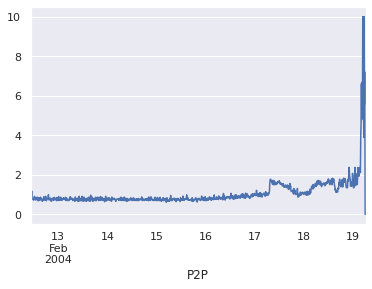

In [ ]:
p2p = Features.P2P1
p2p.plot()
plt.xlabel('P2P')

Text(0.5, 0, 'Kurtosis')

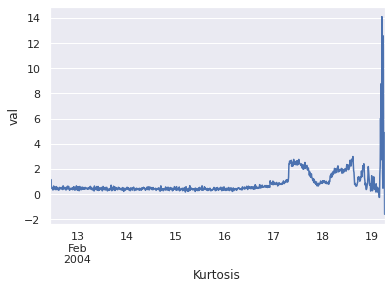

In [ ]:
kurtosis = Features.Kurtosis1
kurtosis.plot()
plt.ylabel('val')
plt.xlabel('Kurtosis')

Text(0.5, 0, 'Skewness')

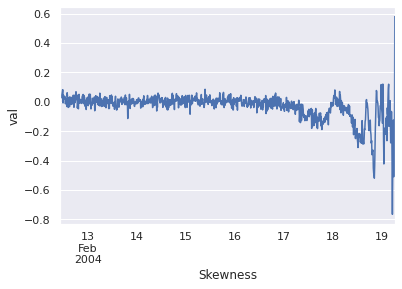

In [ ]:
skew = Features.Skewness1
skew.plot()
plt.ylabel('val')
plt.xlabel('Skewness')

Text(0.5, 0, 'RMS')

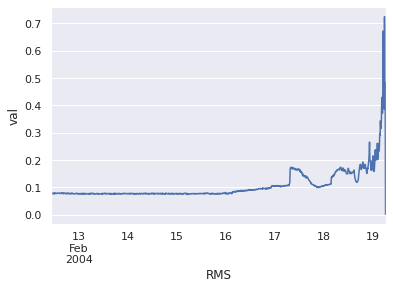

In [ ]:
rms = Features.RMS1
rms.plot()
plt.ylabel('val')
plt.xlabel('RMS')

Text(0.5, 0, 'Crest Factor')

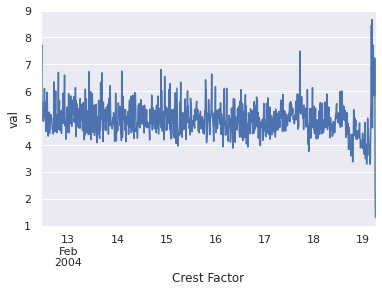

In [ ]:
crest_factor = Features['Crest Factor1']
crest_factor.plot()

plt.ylabel('val')
plt.xlabel('Crest Factor')

Text(0.5, 0, 'Form Factor')

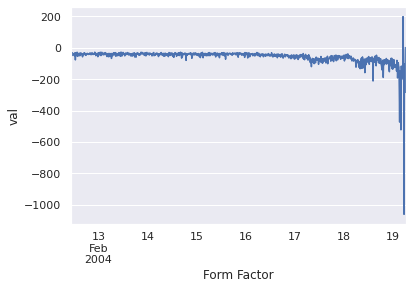

In [ ]:
form_factor = Features['Form Factor1']
form_factor.plot()
plt.ylabel('val')
plt.xlabel('Form Factor')

Text(0.5, 0, 'Max')

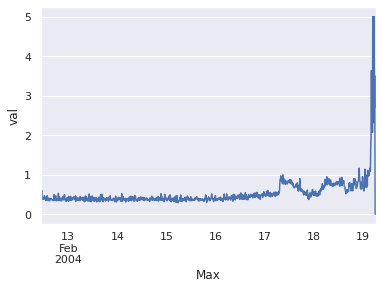

In [ ]:
form_factor = Features['Max1']
form_factor.plot()
plt.ylabel('val')
plt.xlabel('Max')

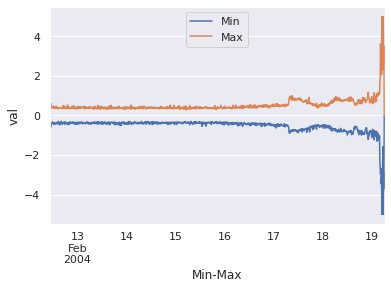

In [ ]:
min_val = Features['Min1']
min_val.plot()
max_val = Features['Max1']
max_val.plot()
plt.ylabel('val')
plt.xlabel('Min-Max')
plt.legend(['Min', 'Max'], loc = "upper center")

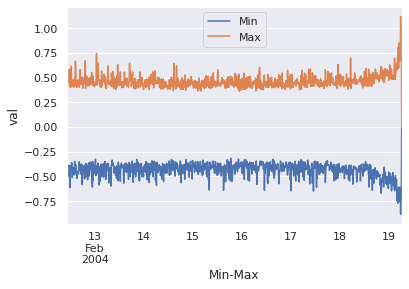

In [ ]:
min_val = Features['Min2']
min_val.plot()
max_val = Features['Max2']
max_val.plot()
plt.ylabel('val')
plt.xlabel('Min-Max')
plt.legend(['Min', 'Max'], loc = "upper center")

In [ ]:
counter = 0 
B1 = []
B2 = []
B3 = []
B4 = []
for row in Features.Max1:
    counter += 1
    
    if counter<=400:
        B1.append("early")

    if 400 < counter <=500:
        B1.append("normal")
    if 500 < counter <= 850:
        B1.append("suspect")
    if 850 < counter <= 984:
        B1.append("imminent_failure")
    
    if counter<=400:
        B2.append("early")
    if 400 < counter <=800:
        B2.append("normal")
    if 800 < counter <=984:
        B2.append("suspect")
    #if 850< counter <=984:
        #B2.append("imminet_failure")

    if counter<=200:
        B3.append("early")
    if 200 < counter <= 500:
        B3.append("normal")
    if 500 < counter <= 600:
        B3.append("suspect")
    if 600 < counter <=984:
        B3.append("Inner_race_failure")
  
    if counter<=200:
        B4.append("early")
    if 200 < counter <=400:
        B4.append("normal")
    if 400 < counter <= 500:
        B4.append("suspect")
    if 500 < counter <= 600:
        B4.append("Inner_race_failure")
    if 600 < counter <=984:
        B4.append("Stage_two_failure")

In [ ]:
Features['Bearing_1_cond'] = B1
Features['Bearing_2_cond'] = B2
Features['Bearing_3_cond'] = B3
Features['Bearing_4_cond'] = B4


In [ ]:
Features

,Max1,Min1,Mean1,Std1,RMS1,Skewness1,Kurtosis1,Crest Factor1,Form Factor1,P2P1,...,RMS4,Skewness4,Kurtosis4,Crest Factor4,Form Factor4,P2P4,Bearing_1_cond,Bearing_2_cond,Bearing_3_cond,Bearing_4_cond
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307,0.840,...,0.054103,-0.022078,0.065660,3.567239,-5.396329,0.457,early,early,early,early
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382,0.757,...,0.056101,0.001582,0.107236,4.438435,-14.827018,0.478,early,early,early,early
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508,0.903,...,0.056145,0.070444,0.256918,6.305078,-16.108911,0.688,early,early,early,early
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322,1.184,...,0.056807,-0.036324,0.805818,9.030509,-15.186020,1.038,early,early,early,early
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152,0.782,...,0.056841,0.019006,0.138647,4.292680,-21.032042,0.456,early,early,early,early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419,9.998,...,0.148351,-0.051945,-0.093570,3.653494,-50.473985,1.086,imminent_failure,suspect,Inner_race_failure,Stage_two_failure
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656,5.569,...,0.116630,0.119884,0.259273,4.518571,-35.180992,0.976,imminent_failure,suspect,Inner_race_failure,Stage_two_failure
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983,7.197,...,0.130582,0.167966,0.696806,4.786252,-39.440269,1.104,imminent_failure,suspect,Inner_race_failure,Stage_two_failure
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578,0.005,...,0.002154,0.656632,1.652267,2.321622,1.206167,0.007,imminent_failure,suspect,Inner_race_failure,Stage_two_failure


In [ ]:
X1 = Features.iloc[:,:10]
X2 = Features.iloc[:,10:20]
X3 = Features.iloc[:,20:30]
X4 = Features.iloc[:,30:40]

Y1 = Features.iloc[:,40]
Y2 = Features.iloc[:,41]
Y3 = Features.iloc[:,42]
Y4 = Features.iloc[:,43]




In [ ]:
## Preprocessing the Data 

scaler = preprocessing.MinMaxScaler()

X1 = pd.DataFrame(scaler.fit_transform(X1), 
                              columns=X1.columns, 
                              index=X1.index)

labelenc = preprocessing.LabelEncoder()
labelenc.fit(Y1)
Y1 = labelenc.transform(Y1)
# Random shuffle training data
X1_train, X1_test, Y1_train, Y1_test  = train_test_split(X1,Y1, test_size = 0.3)



In [ ]:
classifier_names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA","XGBoost","CatGBoost","LightGBoost"]

classifiers_list = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    xgb.XGBClassifier(),
    cb.CatBoostClassifier(verbose = False),
    lgbm.LGBMClassifier()
    ]
clf_results= []
for name, clf in zip(classifier_names,classifiers_list):
    print("training "+name+" ...")
    clf.fit(X1_train,Y1_train)
    score = clf.score(X1_test,Y1_test)
    clf_results.append(score)
    print('Score of'+name+' is: '+str(score))
    #iterate over classifiers

clf_df = pd.DataFrame(clf_results)
clf_df.index = classifier_names

training Nearest Neighbors ...
Score ofNearest Neighbors is: 0.8141891891891891
training Linear SVM ...
Score ofLinear SVM is: 0.4155405405405405
training RBF SVM ...
Score ofRBF SVM is: 0.7567567567567568
training Decision Tree ...
Score ofDecision Tree is: 0.7702702702702703
training Random Forest ...
Score ofRandom Forest is: 0.8277027027027027
training Neural Net ...
Score ofNeural Net is: 0.7432432432432432
training AdaBoost ...
Score ofAdaBoost is: 0.75
training Naive Bayes ...
Score ofNaive Bayes is: 0.7837837837837838
training QDA ...
Score ofQDA is: 0.6182432432432432
training XGBoost ...


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Score ofXGBoost is: 0.831081081081081
training CatGBoost ...
Score ofCatGBoost is: 0.8277027027027027
training LightGBoost ...
Score ofLightGBoost is: 0.8040540540540541


In [ ]:
clf_df

,0
Nearest Neighbors,0.814189
Linear SVM,0.415541
RBF SVM,0.756757
Decision Tree,0.770270
Random Forest,0.827703
Neural Net,0.743243
AdaBoost,0.750000
Naive Bayes,0.783784
QDA,0.618243
XGBoost,0.831081


In [ ]:
def objective(trial):
    xgb_params = dict(
        max_depth=trial.suggest_int("max_depth", 2, 10),
        
        learning_rate=trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        n_estimators=trial.suggest_int("n_estimators", 1000, 8000),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.2, 1.0),
        subsample=trial.suggest_float("subsample", 0.2, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
        reg_lambda=trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
        )
    xgb_cl = xgb.XGBClassifier(
            booster='gbtree',
            use_label_encoder=False,
            **xgb_params)
    xgb_cl.fit(X1_train, Y1_train)
    preds = xgb_cl.predict(X1_test)
    accuracy_score(Y1_test, preds)
    return accuracy_score(Y1_test,preds)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
xgb_params = study.best_params

[I 2022-11-04 09:25:12,864] A new study created in memory with name: no-name-6f864dbc-3973-4e2e-98b1-8d6c54c72856
[I 2022-11-04 09:25:21,001] Trial 0 finished with value: 0.8344594594594594 and parameters: {'max_depth': 10, 'learning_rate': 0.00010207590354696399, 'n_estimators': 2300, 'min_child_weight': 3, 'colsample_bytree': 0.3618425209970324, 'subsample': 0.9490849609910073, 'reg_alpha': 0.0001195417566601765, 'reg_lambda': 0.00016926899575587013}. Best is trial 0 with value: 0.8344594594594594.
[I 2022-11-04 09:25:32,654] Trial 1 finished with value: 0.831081081081081 and parameters: {'max_depth': 2, 'learning_rate': 0.00011555870635384097, 'n_estimators': 5812, 'min_child_weight': 6, 'colsample_bytree': 0.972089377730011, 'subsample': 0.5808617116262778, 'reg_alpha': 3.864792310654484, 'reg_lambda': 0.002506421923553735}. Best is trial 0 with value: 0.8344594594594594.
[I 2022-11-04 09:25:36,993] Trial 2 finished with value: 0.8277027027027027 and parameters: {'max_depth': 8, 'l

In [ ]:
best_params = pd.DataFrame(xgb_params.items(), columns=['Param', 'Value'])
best_params

,Param,Value
0,max_depth,8.000000
1,learning_rate,0.001363
2,n_estimators,7997.000000
3,min_child_weight,9.000000
4,colsample_bytree,0.230149
5,subsample,0.815626
6,reg_alpha,2.293529
7,reg_lambda,1.992510


In [ ]:
final_model = xgb.XGBClassifier(use_label_encoder=False,**xgb_params)
final_model.fit(X1_train, Y1_train)
preds = final_model.predict(X1_test)
accuracy_score(Y1_test, preds)


0.8547297297297297